In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import csv

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [ ]:
data_reformat = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/reformat_data.csv')
data_reformat

In [ ]:
from sklearn import preprocessing
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data_reformat[LABEL] = le.fit_transform(data_reformat['class'].values.ravel())
dummy=data_reformat.groupby(['class'])
dummy.head(10)

In [6]:
data_reformat.dtypes


unique_id            int64
user_id              int64
x0                 float64
x1                 float64
x2                 float64
x3                 float64
x4                 float64
x5                 float64
x6                 float64
x7                 float64
x8                 float64
x9                 float64
y0                 float64
y1                 float64
y2                 float64
y3                 float64
y4                 float64
y5                 float64
y6                 float64
y7                 float64
y8                 float64
y9                 float64
z0                 float64
z1                 float64
z2                 float64
z3                 float64
z4                 float64
z5                 float64
z6                 float64
z7                 float64
z8                 float64
z9                 float64
xavg                 int64
yavg               float64
zavg               float64
xpeak              float64
ypeak              float64
z

In [7]:
from numpy.random import seed
seed(1)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [9]:
y =data_reformat["ActivityEncoded"]
y.head(10)

0    1
1    1
2    1
3    5
4    5
5    5
6    4
7    4
8    4
9    4
Name: ActivityEncoded, dtype: int32

In [13]:
x = data_reformat[['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','y0','y1','y2','y3','y4','y5','y6','y7','y8','y9','z0','z1','z2','z3','z4','z5','z6','z7','z8','z9','xavg','yavg','zavg','xpeak','ypeak','zpeak','xabsoldev','yabsoldev','zabsoldev','xstandardev','ystandarddev','zstandarddev']]
#feature_names = x.columns
x.head()
x.dtypes

x0              float64
x1              float64
x2              float64
x3              float64
x4              float64
x5              float64
x6              float64
x7              float64
x8              float64
x9              float64
y0              float64
y1              float64
y2              float64
y3              float64
y4              float64
y5              float64
y6              float64
y7              float64
y8              float64
y9              float64
z0              float64
z1              float64
z2              float64
z3              float64
z4              float64
z5              float64
z6              float64
z7              float64
z8              float64
z9              float64
xavg              int64
yavg            float64
zavg            float64
xpeak           float64
ypeak           float64
zpeak           float64
xabsoldev       float64
yabsoldev       float64
zabsoldev       float64
xstandardev     float64
ystandarddev    float64
zstandarddev    

In [14]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=40)

In [15]:
y_train

5034    1
154     5
58      5
540     1
3536    0
       ..
3603    1
4722    1
3340    4
3064    4
3398    5
Name: ActivityEncoded, Length: 4063, dtype: int32

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [17]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_test_categorical

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#59.78%
#model.add(Dense(units=6, activation='relu', input_dim=30))
#model.add(Dense(units=6, activation='softmax'))
#82.66%, with noise - (0.05- 83.76%, 83.1%, 0.2 - 84.2%, 81.9%),with dropout (0.5)-85 to 87%, with dropout (0.1,0.1) - 85.2%, (0.2,0.1) - 86-87%
model.add(Dense(units=60, activation='relu', input_dim=42))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=6, activation='softmax'))
#keras.layers.Dropout(0.05, noise_shape=None, seed=5)

#82.7%
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers.normalization import BatchNormalization
#model.add(Dense(units=60, use_bias=False, activation='relu', input_dim=42))
#model.add(BatchNormalization())
#model.add(Dense(units=100, activation='relu'))
##model.add(BatchNormalization())
#model.add(Dense(units=6, activation='softmax'))
##model.add(BatchNormalization())
#keras.layers.Dropout(0.05, noise_shape=None, seed=5)

#63.83 -- old experiment; tried again, not worth the effort
#model.add(Dense(units=120, activation='relu', input_dim=30))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=6, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 60)                2580      
_________________________________________________________________
dropout_11 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               6100      
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 606       
Total params: 9,286
Trainable params: 9,286
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#from keras.optimizers import SGD
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy',
#              optimizer=sgd,
#              metrics=['accuracy'])

In [40]:
# Fit the model to the training data
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
model.fit(X_train_scaled, y_train_categorical, epochs=300, class_weight=class_weights, verbose=2)

#model.fit(
#    X_train_scaled,
#    y_train_categorical,
#    epochs=200,
#    shuffle=True,
#    verbose=2
#)



Epoch 1/300
 - 1s - loss: 1.2059 - accuracy: 0.6096
Epoch 2/300
 - 0s - loss: 0.7956 - accuracy: 0.7204
Epoch 3/300
 - 0s - loss: 0.6815 - accuracy: 0.7453
Epoch 4/300
 - 0s - loss: 0.6262 - accuracy: 0.7637
Epoch 5/300
 - 0s - loss: 0.5905 - accuracy: 0.7704
Epoch 6/300
 - 0s - loss: 0.5580 - accuracy: 0.7839
Epoch 7/300
 - 0s - loss: 0.5418 - accuracy: 0.7891
Epoch 8/300
 - 0s - loss: 0.5212 - accuracy: 0.7896
Epoch 9/300
 - 0s - loss: 0.5135 - accuracy: 0.7928
Epoch 10/300
 - 0s - loss: 0.4883 - accuracy: 0.8073
Epoch 11/300
 - 0s - loss: 0.4805 - accuracy: 0.8070
Epoch 12/300
 - 0s - loss: 0.4566 - accuracy: 0.8186
Epoch 13/300
 - 0s - loss: 0.4483 - accuracy: 0.8206
Epoch 14/300
 - 0s - loss: 0.4435 - accuracy: 0.8230
Epoch 15/300
 - 0s - loss: 0.4268 - accuracy: 0.8344
Epoch 16/300
 - 0s - loss: 0.4166 - accuracy: 0.8351
Epoch 17/300
 - 0s - loss: 0.4120 - accuracy: 0.8415
Epoch 18/300
 - 0s - loss: 0.4037 - accuracy: 0.8430
Epoch 19/300
 - 0s - loss: 0.3973 - accuracy: 0.8422
Ep

Epoch 155/300
 - 0s - loss: 0.1535 - accuracy: 0.9439
Epoch 156/300
 - 0s - loss: 0.1467 - accuracy: 0.9459
Epoch 157/300
 - 0s - loss: 0.1447 - accuracy: 0.9456
Epoch 158/300
 - 0s - loss: 0.1387 - accuracy: 0.9481
Epoch 159/300
 - 0s - loss: 0.1630 - accuracy: 0.9380
Epoch 160/300
 - 0s - loss: 0.1542 - accuracy: 0.9407
Epoch 161/300
 - 0s - loss: 0.1423 - accuracy: 0.9495
Epoch 162/300
 - 0s - loss: 0.1401 - accuracy: 0.9486
Epoch 163/300
 - 0s - loss: 0.1428 - accuracy: 0.9451
Epoch 164/300
 - 0s - loss: 0.1480 - accuracy: 0.9436
Epoch 165/300
 - 0s - loss: 0.1452 - accuracy: 0.9466
Epoch 166/300
 - 0s - loss: 0.1514 - accuracy: 0.9436
Epoch 167/300
 - 0s - loss: 0.1348 - accuracy: 0.9488
Epoch 168/300
 - 0s - loss: 0.1324 - accuracy: 0.9552
Epoch 169/300
 - 0s - loss: 0.1307 - accuracy: 0.9523
Epoch 170/300
 - 0s - loss: 0.1316 - accuracy: 0.9500
Epoch 171/300
 - 0s - loss: 0.1399 - accuracy: 0.9456
Epoch 172/300
 - 0s - loss: 0.1430 - accuracy: 0.9422
Epoch 173/300
 - 0s - loss: 

In [41]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5630168875645007, Accuracy: 0.8612546324729919


In [343]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [344]:
#other code to use label encoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data_reformat['class'].values)
print(integer_encoded)



[1 1 1 ... 2 2 2]


In [345]:
model_loss_training, model_accuracy_training = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss_training}, Accuracy: {model_accuracy_training}")

Normal Neural Network - Loss: 0.022639295654272817, Accuracy: 0.9972926378250122


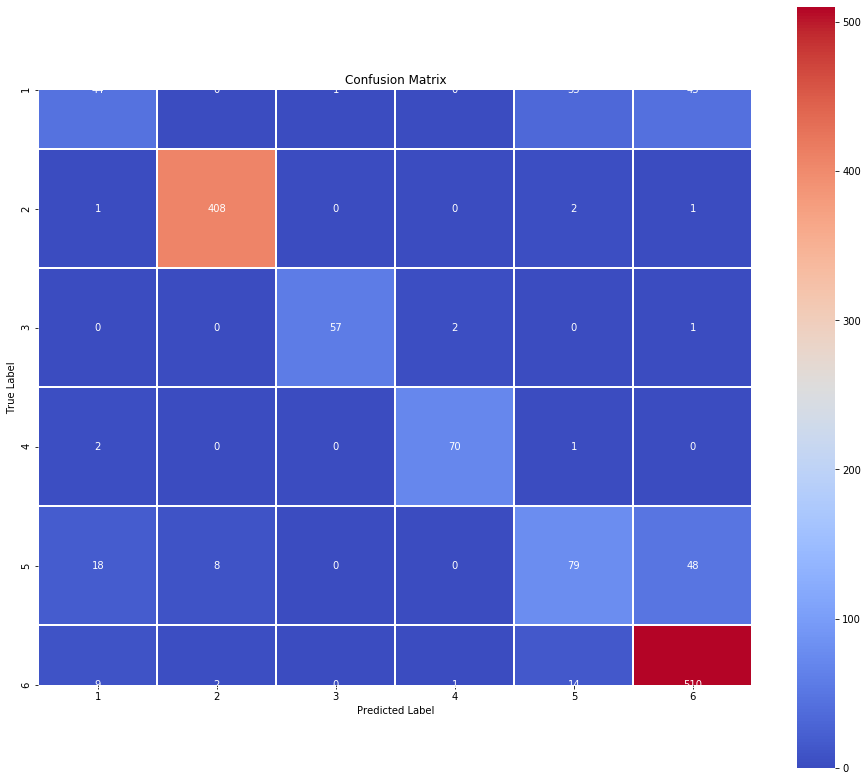

              precision    recall  f1-score   support

           0       0.59      0.36      0.45       121
           1       0.98      0.99      0.98       412
           2       0.98      0.95      0.97        60
           3       0.96      0.96      0.96        73
           4       0.61      0.52      0.56       153
           5       0.85      0.95      0.90       536

    accuracy                           0.86      1355
   macro avg       0.83      0.79      0.80      1355
weighted avg       0.85      0.86      0.85      1355



In [346]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(16, 14))
    plt.tight_layout()
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels= [1,2,3,4,5,6],
                yticklabels= [1,2,3,4,5,6],
                annot=True,
                square=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_test_scaled)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_categorical, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [347]:
X_test_scaled

array([[-0.59730833, -0.51111261, -0.49752183, ...,  1.16763333,
         1.3729963 ,  1.16763333],
       [ 0.48165743,  0.74713666,  0.91310705, ...,  1.60118031,
         0.64907354,  1.60118031],
       [ 0.48165743, -0.33136272, -0.67385044, ...,  2.06614375,
         1.92165354,  2.06614375],
       ...,
       [-1.27166193, -1.76936188, -1.7318221 , ..., -0.44717212,
        -1.39315064, -0.44717212],
       [-0.59730833, -0.15161282, -0.49752183, ..., -0.79275306,
         1.52540109, -0.79275306],
       [-0.46243761, -0.51111261,  0.56044983, ..., -0.5508464 ,
        -0.38727903, -0.5508464 ]])

In [348]:
# Grab just one data point to test with
test = np.expand_dims(X_test_scaled[100], axis=0)
result = np.expand_dims(y_test_categorical[100], axis=0)
test.shape
test
result

array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

In [349]:
# Make a prediction. The result should be 5 - STANDING
print(f"Predicted class: {model.predict_classes(test)}")

Predicted class: [3]


In [68]:
from keras.layers import Dense, Dropout , BatchNormalization

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#adding more layers to the model
model = Sequential()

model.add(Dense(units=60, activation='relu', input_dim=42))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=6, activation='softmax'))
#keras.layers.Dropout(0.05, noise_shape=None, seed=5)




In [128]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 60)                2580      
_________________________________________________________________
dense_45 (Dense)             (None, 100)               6100      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_47 (Dense)             (None, 196)               12740     
_________________________________________________________________
dense_48 (Dense)             (None, 196)               38612     
_________________________________________________________________
dense_49 (Dense)             (None, 32)                6304      
_________________________________________________________________
dense_50 (Dense)             (None, 6)                

In [129]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [130]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 4063 samples
Epoch 1/100
4063/4063 - 1s - loss: 0.9934 - accuracy: 0.6650
Epoch 2/100
4063/4063 - 0s - loss: 0.6076 - accuracy: 0.7684
Epoch 3/100
4063/4063 - 0s - loss: 0.5197 - accuracy: 0.7871
Epoch 4/100
4063/4063 - 0s - loss: 0.4702 - accuracy: 0.8149
Epoch 5/100
4063/4063 - 0s - loss: 0.4187 - accuracy: 0.8324
Epoch 6/100
4063/4063 - 0s - loss: 0.3894 - accuracy: 0.8437
Epoch 7/100
4063/4063 - 0s - loss: 0.3574 - accuracy: 0.8587
Epoch 8/100
4063/4063 - 0s - loss: 0.3213 - accuracy: 0.8688
Epoch 9/100
4063/4063 - 0s - loss: 0.3151 - accuracy: 0.8745
Epoch 10/100
4063/4063 - 0s - loss: 0.2771 - accuracy: 0.8878
Epoch 11/100
4063/4063 - 0s - loss: 0.2548 - accuracy: 0.8961
Epoch 12/100
4063/4063 - 0s - loss: 0.2366 - accuracy: 0.9038
Epoch 13/100
4063/4063 - 0s - loss: 0.2348 - accuracy: 0.9018
Epoch 14/100
4063/4063 - 0s - loss: 0.2096 - accuracy: 0.9146
Epoch 15/100
4063/4063 - 1s - loss: 0.1775 - accuracy: 0.9259
Epoch 16/100
4063/4063 - 0s - loss: 0.1711 - accuracy: 0.

In [131]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1355/1 - 0s - loss: 1.1899 - accuracy: 0.8332
Normal Neural Network - Loss: 1.3076625861804863, Accuracy: 0.8332103490829468


In [134]:
from keras.layers import Dense,LSTM,Dropout

np.random.seed(7)
model = Sequential()
model.add(LSTM(24, input_dim =42,return_sequences=True))
model.add(LSTM(12))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\agarw\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
C:\Users\agarw\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(24, return_sequences=True, input_shape=(None, 42))`
  """


TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.recurrent.LSTM object at 0x000001A6A75C9BE0>

In [ ]:
data = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1.csv')
data

In [44]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# import numpy as np

# data_dim = 6
# timesteps = 100
# num_classes = 10
# batch_size = 32

# # Expected input batch shape: (batch_size, timesteps, data_dim)
# # Note that we have to provide the full batch_input_shape since the network is stateful.
# # the sample of index i in batch k is the follow-up for the sample i in batch k-1.
# model = Sequential()
# model.add(LSTM(32, return_sequences=True, stateful=True,
#                batch_input_shape=(batch_size, timesteps, data_dim)))
# model.add(LSTM(32, return_sequences=True, stateful=True))
# model.add(LSTM(32, stateful=True))
# model.add(Dense(6, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# # Generate dummy training data
# x_train = np.random.random((batch_size * 10, timesteps, data_dim))
# y_train = np.random.random((batch_size * 10, num_classes))

# # Generate dummy validation data
# x_val = np.random.random((batch_size * 3, timesteps, data_dim))
# y_val = np.random.random((batch_size * 3, num_classes))

# model.fit(x_train, y_train,
#           batch_size=batch_size, epochs=5, shuffle=False,
#           validation_data=(x_val, y_val))


In [2]:
data = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1.csv')
data

,user_id,activity,timestamp,acc_x,acc_y,acc_z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098204,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098205,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098206,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098207,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [3]:
from sklearn import preprocessing
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data[LABEL] = le.fit_transform(data['activity'].values.ravel())
# dummy=data_reformat.groupby(['class'])
# dummy.head(10)

data

dummy2=data.groupby(['activity'])
dummy2.head(10)

,user_id,activity,timestamp,acc_x,acc_y,acc_z,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526,1
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926,1
7,33,Jogging,49106652389000,-0.503953,13.947236,7.055340,1
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871,1
9,33,Jogging,49106872299000,0.953424,1.375655,1.648062,1


In [4]:
data_train = data[data['user_id'] >20]
data_test =  data[data['user_id'] <=20]


In [5]:
data_train
data_train_filter = data_train[['user_id','acc_x','acc_y','acc_z','ActivityEncoded']]
data_train_filter

,user_id,acc_x,acc_y,acc_z,ActivityEncoded
0,33,-0.694638,12.680544,0.503953,1
1,33,5.012288,11.264028,0.953424,1
2,33,4.903325,10.882658,-0.081722,1
3,33,-0.612916,18.496431,3.023717,1
4,33,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...
997750,25,10.530000,14.900000,7.400000,1
997751,25,3.170000,15.700000,4.630000,1
997752,25,-1.040000,15.790000,-4.250000,1
997753,25,6.130000,10.230000,0.500000,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

data_training_scaled = scaler.fit_transform(data_train_filter)
data_training_scaled

array([[0.8       , 0.47814364, 0.81438951, 0.51284938, 0.2       ],
       [0.8       , 0.62240364, 0.77866401, 0.52430965, 0.2       ],
       [0.8       , 0.61964927, 0.7690456 , 0.49791632, 0.2       ],
       ...,
       [0.26666667, 0.46941355, 0.89281211, 0.39163692, 0.2       ],
       [0.26666667, 0.65065723, 0.75258512, 0.5127486 , 0.2       ],
       [0.26666667, 0.49772497, 0.72736444, 0.46659867, 0.2       ]])

In [89]:
# N_TIME_STEPS = 200
# N_FEATURES = 3
# step = 20
# segments = []
# labels = []
# for i in range(0, len(data_training_scaled) - N_TIME_STEPS, step):
#     xs = data_training_scaled['acc_x'].values[i: i + N_TIME_STEPS]
#     ys = data_training_scaled['acc_y'].values[i: i + N_TIME_STEPS]
#     zs = data_training_scaled['acc_z'].values[i: i + N_TIME_STEPS]
#     label = stats.mode(data_training_scaled['ActivityEncoded'][i: i + N_TIME_STEPS])[0][0]
#     segments.append([xs, ys, zs])
#     labels.append(label)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
features_set = []
labels = []
for i in range(200, 474942):
    features_set.append(data_training_scaled[i-200:i, 0])
    labels.append(data_training_scaled[i, 0])
    
labels
# features_set

In [95]:
features_set, labels = np.array(features_set), np.array(labels)

In [96]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [98]:
features_set

array([[[0.8       ],
        [0.8       ],
        [0.8       ],
        ...,
        [0.8       ],
        [0.8       ],
        [0.8       ]],

       [[0.8       ],
        [0.8       ],
        [0.8       ],
        ...,
        [0.8       ],
        [0.8       ],
        [0.8       ]],

       [[0.8       ],
        [0.8       ],
        [0.8       ],
        ...,
        [0.8       ],
        [0.8       ],
        [0.8       ]],

       ...,

       [[0.26666667],
        [0.26666667],
        [0.26666667],
        ...,
        [0.26666667],
        [0.26666667],
        [0.26666667]],

       [[0.26666667],
        [0.26666667],
        [0.26666667],
        ...,
        [0.26666667],
        [0.26666667],
        [0.26666667]],

       [[0.26666667],
        [0.26666667],
        [0.26666667],
        ...,
        [0.26666667],
        [0.26666667],
        [0.26666667]]])

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [105]:
model = Sequential()

In [106]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [107]:
model.add(Dropout(0.2))

In [108]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [109]:
model.add(Dense(units = 1))

In [111]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
 33024/474742 [=>............................] - ETA: 2:19:09 - loss: 0.0045